# **Principal Component Analysis (PCA)**

In [2]:
#pip install scikit-learn
#pip install matplotlib

You should consider upgrading via the '/Users/kriadanikaj/miniconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#to display matplotlib plots 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

/var/folders/qb/0g8nlthj72x1w4l5qpmlr_s40000gn/T/ipykernel_48606/2617201046.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


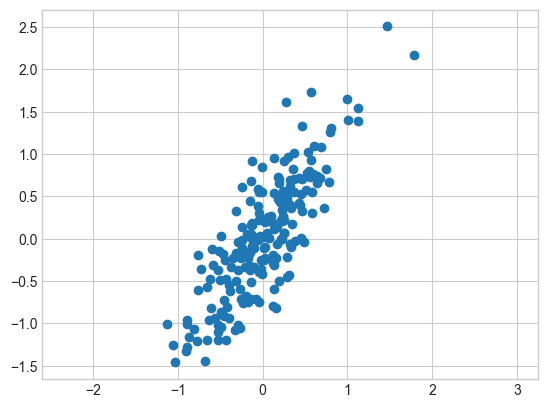

In [3]:
rng = np.random.RandomState(2)#Generate random numbers: seed=2
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T #Create a matrix X with dimensions 200x2
plt.scatter(X[:, 0], X[:, 1]) #Plot the Matrix
plt.axis('equal');

We can see that there is a relation between x and y variables. In principal component analysis, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset. Using Scikit-Learn's PCA estimator, we can compute this as follows:

In [4]:
from sklearn.decomposition import PCA
#creates an instance of PCA class from the 'sklearn.decomposition' module in scikit-learn.
# dimensionality of the data=2 principal components
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [6]:
#Printing Eigen Vectors
print("Eigen Vectors are:")
for i in pca.components_:
  print(i)

Eigen Vectors are:
[0.51517079 0.85708754]
[-0.85708754  0.51517079]


In [7]:
#Printing Eigen Values
print("Eigen Values are:")
for i in pca.explained_variance_:
  print(i)

Eigen Values are:
0.6766350104183905
0.05315296966302456


We use eigen vectors to define the direction of the vector and the explained variance to define the squared length of the vector:

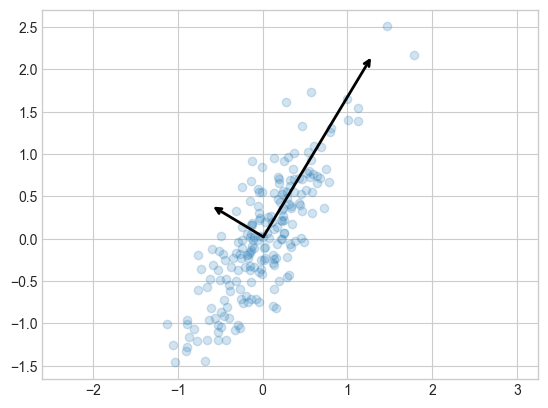

In [8]:
#Draw vector create the vectors that will be displayed
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

The principal components of a dataset are represented by vectors that correspond to the principal axes of the data. The length of each vector indicates the significance of that axis in capturing the distribution of the data. Specifically, it reflects the variance of the data when projected onto that axis. The principal components are obtained by projecting each data point onto these principal axes.

#PCA as Dimensionality Reduction
Dimensionality reduction using PCA involves eliminating one or more of the smallest principal components. This process creates a lower-dimensional representation of the data while retaining the maximum amount of data variance. By discarding the least significant principal components, we can effectively reduce the dimensionality of the dataset.

In [9]:
#creates an instance of PCA 
#dimensionality of data=1 component
pca = PCA(n_components=1)
pca.fit(X)#fits the PCA model to the input data X
X_pca = pca.transform(X)# applies the dimensionality reduction to the input data
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


After applying dimensionality reduction, the transformed data has been reduced to a single dimension. To better comprehend the impact of this reduction, we can reverse the transformation and plot the inverse-transformed data alongside the original data. This will provide visual insight into the relationship between the reduced data and the original data. Refer to the figure below for visualization.

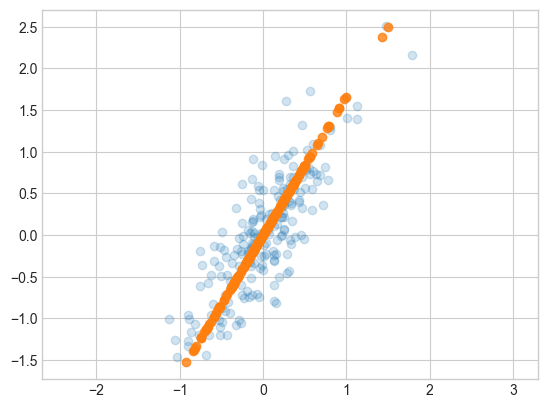

In [10]:
#X_new=Transformed Data
X_new = pca.inverse_transform(X_pca)
#Poting previous data->Color Blue
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#Poting transformed data ->Color Orange
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light blue points in the figure represent the original data, while the orange points represent the projected version after PCA dimensionality reduction. This visualization clearly demonstrates the concept of PCA: it removes the information along the least important principal axis(es), retaining only the component(s) with the highest variance. The fraction of variance that is discarded (indicated by the spread of points around the line in the previous figure) serves as an approximate measure of the amount of "information" lost in this dimensionality reduction.

Despite reducing the number of data features by 50%, this reduced-dimension dataset adequately captures the most significant relationships between the points. The overall relationships between the data points are mostly preserved, indicating that the reduced dataset effectively encodes the crucial information.

**###Now we will apply the same method but will change the seed of random dunction so we can get different data.**

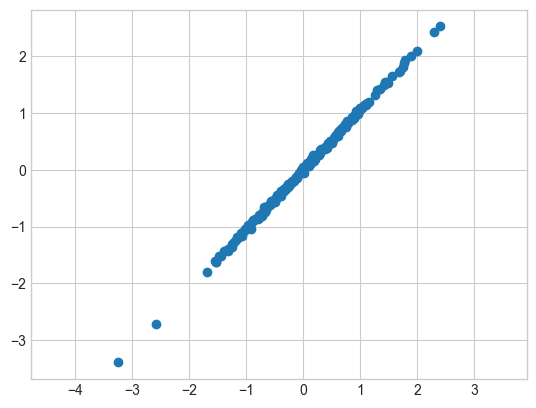

In [11]:
#Seed is 5
rng = np.random.RandomState(5)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Eigen Vectors are:
[-0.69027704 -0.72354517]
[-0.72354517  0.69027704]
Eigen Values are:
1.6460313521232472
0.0003327482711342312


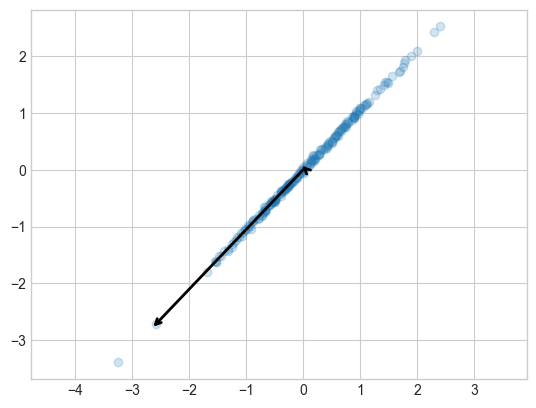

In [12]:
pca = PCA(n_components=2)#Create instance of PCA 
pca.fit(X)#fits the PCA model to the input data X
#Printing Eigen Vectors
print("Eigen Vectors are:")
for i in pca.components_:
  print(i)
#Printing Eigen Values
print("Eigen Values are:")
for i in pca.explained_variance_:
  print(i)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v) #Compute the vectors
plt.axis('equal');

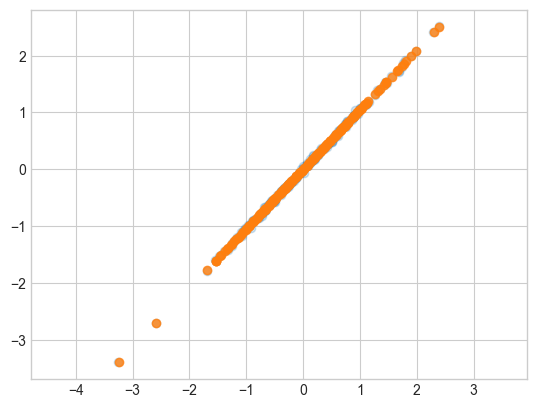

In [13]:
pca = PCA(n_components=1)#creates an instance of PCA, dimension=1 
pca.fit(X)#fits the PCA model to the input data X
X_pca = pca.transform(X)# applies the dimensionality reduction to the input data
X_new = pca.inverse_transform(X_pca)#X_new=Transformed Data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)#Plot old data, color blue
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)#plot transformed data, color orange
plt.axis('equal');

###As we can see in the graph, the transformed data and the original data are almos identical, which means the component with the highest variance contains alsomst all the information. Information loss is low.

###Repeat fro seed=9

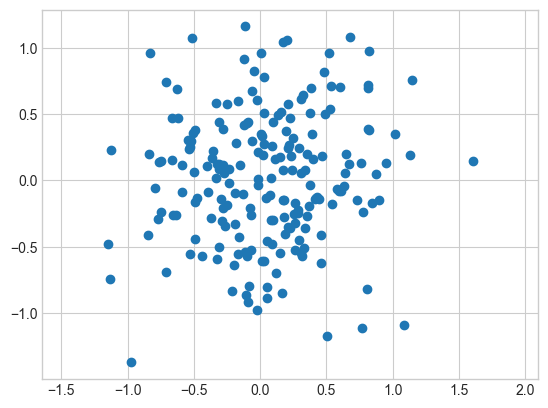

In [14]:
#Seed is 5
rng = np.random.RandomState(9)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Eigen Vectors are:
[-0.60445868 -0.79663649]
[ 0.79663649 -0.60445868]
Eigen Values are:
0.2611109435242661
0.22094578473884263


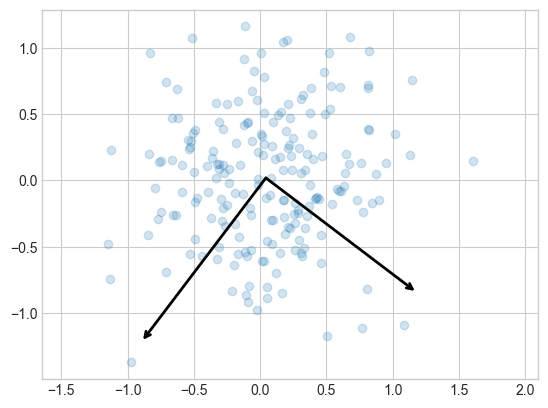

In [15]:
pca = PCA(n_components=2)#Create instance of PCA 
pca.fit(X)#fits the PCA model to the input data X
#Printing Eigen Vectors
print("Eigen Vectors are:")
for i in pca.components_:
  print(i)
#Printing Eigen Values
print("Eigen Values are:")
for i in pca.explained_variance_:
  print(i)
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v) #Compute the vectors
plt.axis('equal');

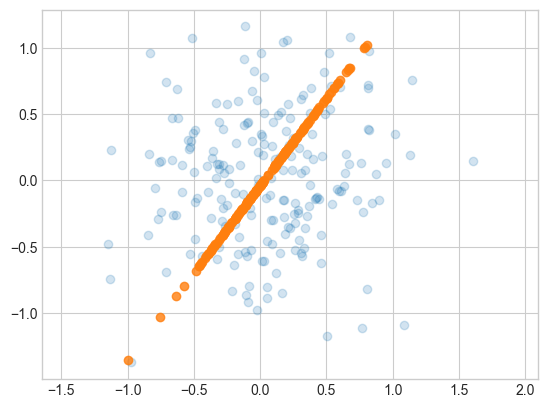

In [16]:
pca = PCA(n_components=1)#creates an instance of PCA, dimension=1 
pca.fit(X)#fits the PCA model to the input data X
X_pca = pca.transform(X)# applies the dimensionality reduction to the input data
X_new = pca.inverse_transform(X_pca)#X_new=Transformed Data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)#Plot old data, color blue
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)#plot transformed data, color orange
plt.axis('equal');

As we can see in the graph, the transformed data and the original data are not similar, which means both componets have comperable (almost equal) variance. PCA removes the information along the least important principal axis, retaining only the component with the highest variance. Information loss is high.

# PCA Vizualization for High-Dimension Data 


We will apply PCA in handwriten digits which are images with 8x8 dimension.

In [17]:
#Uploading the data from sklearn.datasets
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape #Means there are 1797 digits, each 64-dimensional (64 components).

(1797, 64)

In [18]:
pca = PCA(n_components=2)#creates an instance of PCA, dimension=2 
pca.fit(digits.data)#fits the PCA model to the input data 'digits'
projected = pca.transform(digits.data)# applies the dimensionality reduction to the input data
print("Original data dimension:" ,digits.data.shape[1])
print("Projected data dimension:" ,projected.shape[1])

Original data dimension: 64
Projected data dimension: 2


Plotting the projected data. The full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

/var/folders/qb/0g8nlthj72x1w4l5qpmlr_s40000gn/T/ipykernel_46583/2943749715.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('rainbow', 10))


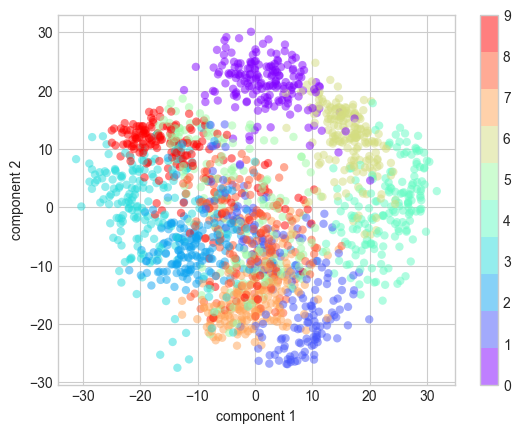

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


Points with the same color belong to the same group or category based on the original features used in the PCA analysis, meanwhile, those with different colors belong to a different group/ category. In our case, points with the same color represent images of the same digit, while different colors correspond to different digits.
By observing the grouping of points with different colors, you can discern relationships, clusters, or patterns in the data. This visual representation aids in understanding the similarities and differences between different groups or categories and can be useful for classification, clustering, or exploratory data analysis tasks.


#EXPLAINED VARIANCE
The explained variance tells us how much information (variance) can be attributed to each of the principal components. This is important because while we can convert four-dimensional space to a two-dimensional space, we lose some of the variance (information). By using the attribute explained_variance_ratio_, we can see what percentage of the variance each principal component contains. Based on that we can decide how much information we want to save and how many components we need to use to do that.

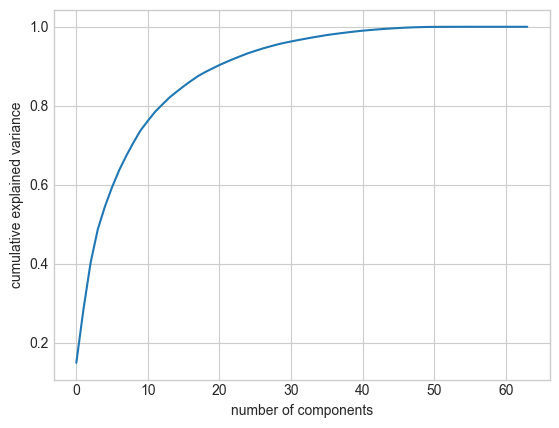

In [20]:
#Ploting Explained Variance
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the graph we can see that the first 40 components contain almost 100% of the variance. The first 20 components contain around 90% of variance.
We can also apply PCA based on the percentage of the variance we want to save. For example if we want to save 95% of information we use:pca = PCA(.95) 

In the example below we have created the function plot_digits(data), which is used to display 40 images of handwritten digits.

Images with 64 components (Original Images): 


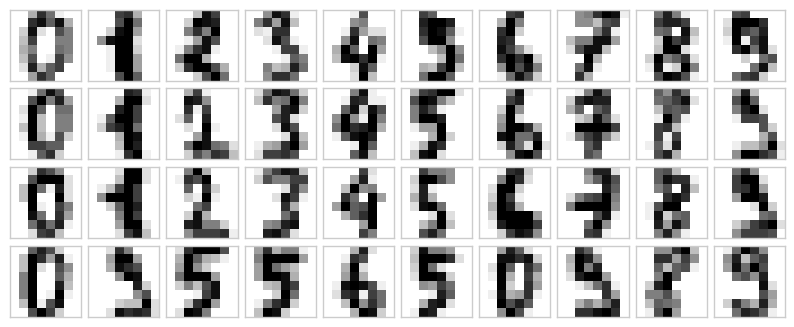

In [21]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
print("Images with 64 components (Original Images): ")
plot_digits(digits.data)


Images with 40 components: 


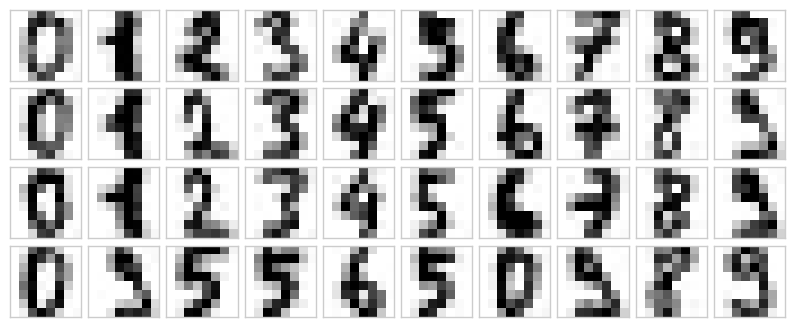

In [22]:
print("Images with 40 components: ")
pca=PCA(40)#creates a new PCA instance with 40 components
pca.fit(digits.data)#fits the PCA model to the input data 'digits'
components = pca.transform(digits.data)#applies the dimensionality reduction to the input data
projected = pca.inverse_transform(components)#get the transformed data
plot_digits(projected)

(1797, 29)
Images with 95% variance: 


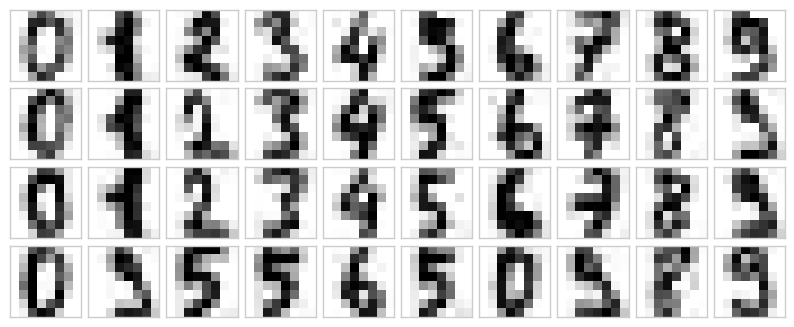

In [23]:
pca = PCA(.95)#creates a new PCA instance with 40 components
pca.fit(digits.data)#fits the PCA model to the input data 'digits'
components = pca.transform(digits.data)# applies the dimensionality reduction to the input data
print(components.shape)
projected = pca.inverse_transform(components)#get the transformed data
print("Images with 95% variance: ")
plot_digits(projected)

This means that only 29 components are needed to save 95% of information. As we can see, the images are almost identical. We reduced the the size of the images by 54% without lossing the main information (saving 95% of it).

# Using PCA as Noise Filter
PCA can be used as a noise filtering technique by exploiting the fact that noise often has a lower variance compared to the signal of interest. The general idea is to project the data onto a lower-dimensional subspace that captures most of the signal while attenuating the noise.

In the example below we used the same digits as above, added some noise to create a noisy dataset and plotted the result.We generated noise with standard deviation of the normal distribution equals to 4. Then we applied PCA(0.5) (which keeps 50% of the variance) and protted the transformet data.

Data with noise:


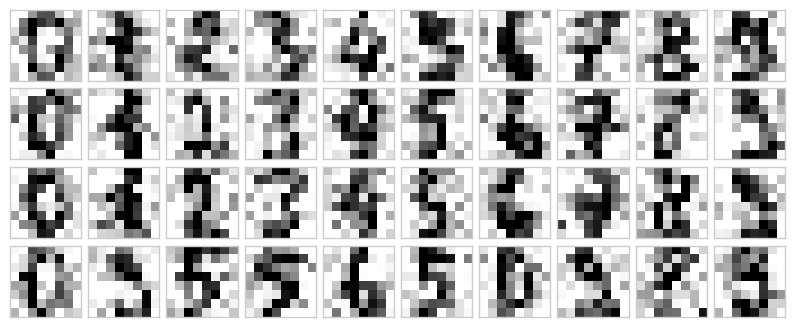

In [24]:
rng = np.random.default_rng(15)#make seed 15
noisy = rng.normal(digits.data, 4)#standard deviation of the normal distribution equals 4.
print("Data with noise:")
plot_digits(noisy)#ploting the digits with noise

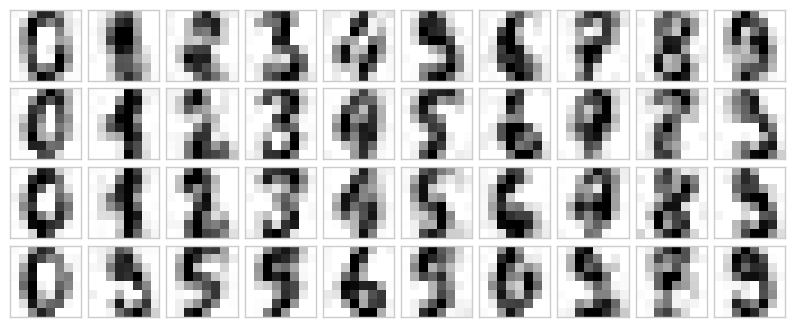

In [25]:
pca = PCA(0.50).fit(noisy) #PCA model on the noisy data, projection preserve 50% of the variance
components = pca.transform(noisy)#applies the dimensionality reduction to the noisy data
filtered = pca.inverse_transform(components)#get the transformed data
plot_digits(filtered)

As we can see, the filtered data is clearer then the noisy data, therefore it is easier to tell what number each image represent. In this case, we didn't only reduce the size of the data, but also got an output with higher quality.

## Using PCA in 62x47 Images

We used the fetch_lfw_people function from scikit-learn's datasets module to retrieve the Labeled Faces in the Wild (LFW) dataset.By calling fetch_lfw_people with the argument min_faces_per_person=90, you specify that you want to retrieve only the images of people who have at least 90 images available in the dataset. This helps ensure a sufficient number of images for training and testing purposes.

In [5]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=90) #get the data
print("List of the names of people in dataset:  ",faces.target_names)
print(faces.images.shape)

List of the names of people in dataset:   ['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


We plotted explained variance to see how much information can be attributed by principal components. As we can see from the graph, 400 first components contain almost 100% of information. The first 200 components contain around 95% of information.

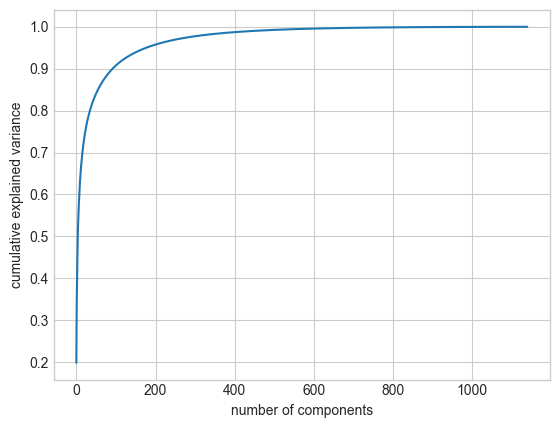

In [6]:
pca = PCA() #create a PCA instance
pca.fit(faces.data)#fits the PCA model to the input data 
plt.plot(np.cumsum(pca.explained_variance_ratio_))#plot explained_variance_ratio_
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Then we applied PCA to original dataset to project data which contains 95%, 90%, and 85%  of information.   
[(95%-->178 components)
(90%-->93 components)
(85%-->56 components)]
Then we ploted the resuls.

In [7]:
#Applying PCA to save 95% of variance
pca=PCA(.95)#create a PCA instance
pca.fit(faces.data)#fits the PCA model to the input data 
components = pca.transform(faces.data)# applies the dimensionality reduction to the input data
projected = pca.inverse_transform(components)#get the transformed data
print(pca.n_components_)


178


In [8]:
#Applying PCA to save 90% of variance
pca=PCA(.90)#create a PCA instance
pca.fit(faces.data)#fits the PCA model to the input data 
components = pca.transform(faces.data)# applies the dimensionality reduction to the input data
projected2 = pca.inverse_transform(components)#get the transformed data
print(pca.n_components_)

93


In [9]:
#Applying PCA to save 85% of variance
pca=PCA(.85)#create a PCA instance
pca.fit(faces.data)#fits the PCA model to the input data 
components = pca.transform(faces.data)# applies the dimensionality reduction to the input data
projected1 = pca.inverse_transform(components)#get the transformed data
print(pca.n_components_)

56


Text(0, 0.5, '56-dim =85%\nreconstruction')

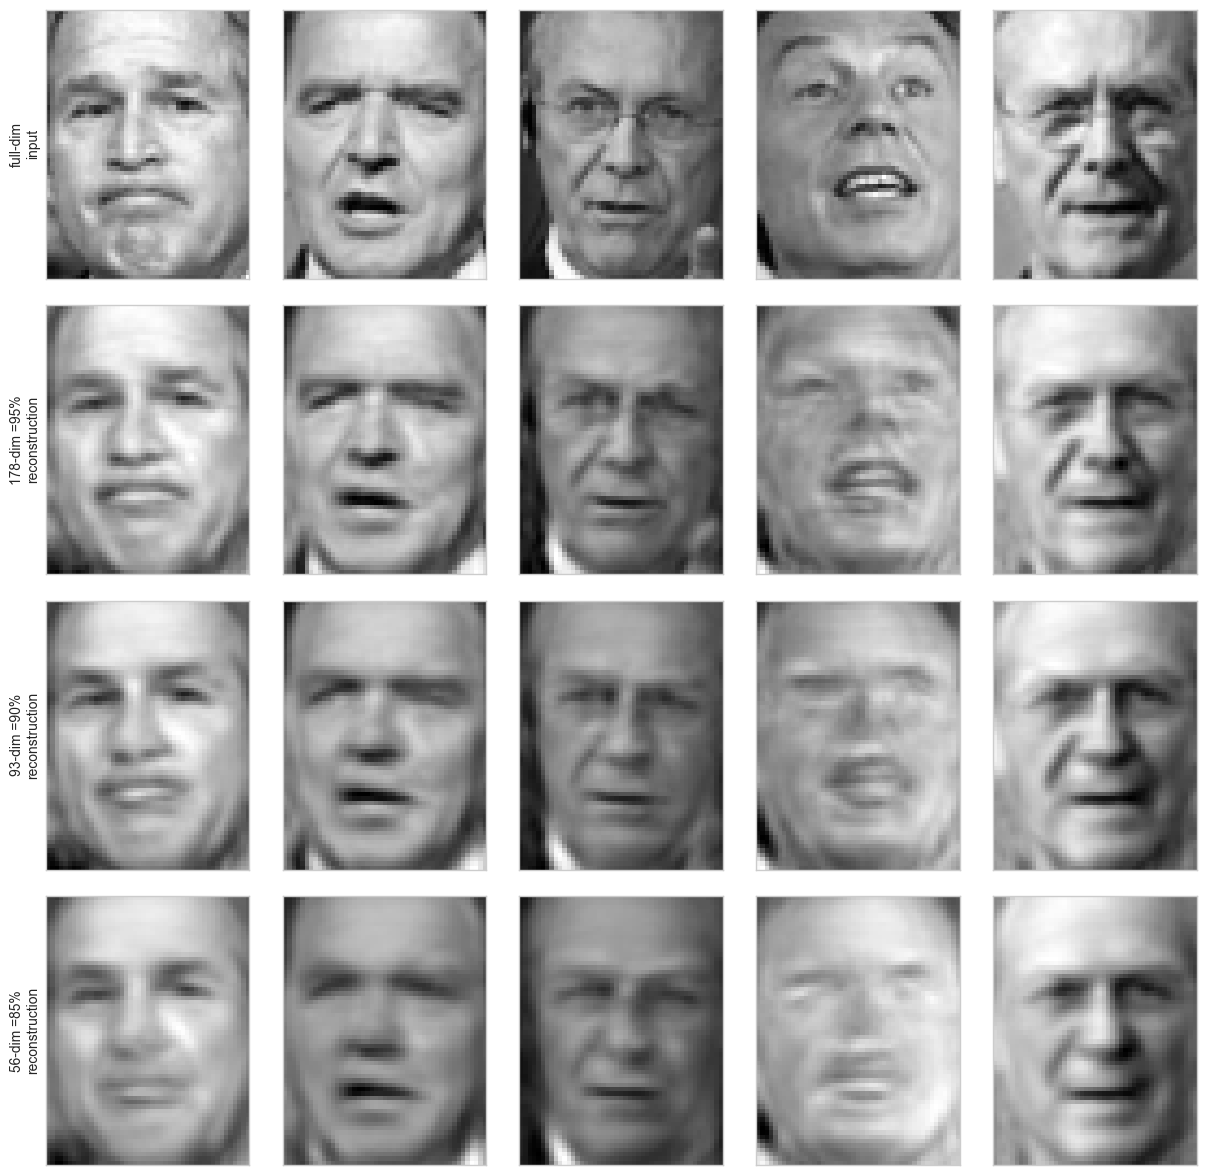

In [10]:
# Plot the results
fig, ax = plt.subplots(4, 5, figsize=(15, 15),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')#original data
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')#95% variance
    ax[2, i].imshow(projected2[i].reshape(62, 47), cmap='binary_r')#90% variance
    ax[3, i].imshow(projected1[i].reshape(62, 47), cmap='binary_r')#85% variance
    
ax[0, 0].set_ylabel('full-dim\ninput')#first row
ax[1, 0].set_ylabel('178-dim =95%\nreconstruction')#second row
ax[2, 0].set_ylabel('93-dim =90%\nreconstruction')#third row
ax[3, 0].set_ylabel('56-dim =85%\nreconstruction')#fourth row

This visualization makes clear why the PCA feature was so successful and it is so important: although it reduces the dimensionality of the data by using only 6.10%,3.19%, and1.92 % of components, the projected images contain respectively 95%, 90%, and 85% of the information. In many cases, the lost information is not visible to the human eye. This means we can use this algorithm to use the correct size of the image which would lead to the most optimal solution.
